# Text Classification with Logistic Regression



The goal of this assignment is to develop and test two text classification systems: 

- **Task 1:** sentiment analysis, in particular to predict the sentiment of movie reviews, i.e. positive or negative (binary classification).
- **Task 2:** topic classification, to predict whether a news article is about International issues, Sports or Business (multi-class classification).


For that purpose, you will implement:


- Text processing methods for extracting Bag-Of-Word features, using 
    - n-grams (BOW), i.e. unigrams, bigrams and trigrams to obtain vector representations of documents where n=1,2,3 respectively. Two vector weighting schemes should be tested: (1) raw frequencies (**3 marks**); (2) tf.idf (**1 mark**). 
    - character n-grams (BOCN). A character n-gram is a contiguous sequence of characters given a word, e.g. for n=2, 'coffee' is split into {'co', 'of', 'ff', 'fe', 'ee'}. Two vector weighting schemes should be tested: (1) raw frequencies (**3 marks**); (2) tf.idf (**1 mark**). **Tip: Note the large vocabulary size!** 
    - a combination of the two vector spaces (n-grams and character n-grams) choosing your best performing wighting respectively (i.e. raw or tfidf). (**3 marks**) **Tip: you should merge the two representations**



- Binary Logistic Regression (LR) classifiers for Task 1 that will be able to accurately classify movie reviews trained with: 
    - (1) BOW-count (raw frequencies) 
    - (2) BOW-tfidf (tf.idf weighted)
    - (3) BOCN-count
    - (4) BOCN-tfidf
    - (5) BOW+BOCN (best performing weighting; raw or tfidf)



- Multiclass Logistic Regression classifiers for Task 2 that will be able to accurately classify news articles trained with:
    - (1) BOW-count (raw frequencies) 
    - (2) BOW-tfidf (tf.idf weighted)
    - (3) BOCN-count
    - (4) BOCN-tfidf
    - (5) BOW+BOCN (best performing weighting; raw or tfidf)



- The Stochastic Gradient Descent (SGD) algorithm to estimate the parameters of your Logistic Regression models. Your SGD algorithm should:
    - Minimise the Binary Cross-entropy loss function for Task 1 (**3 marks**)
    - Minimise the Categorical Cross-entropy loss function for Task 2 (**3 marks**)
    - Use L2 regularisation (**2 marks**)
    - Perform multiple passes (epochs) over the training data (**1 mark**)
    - Randomise the order of training data after each pass (**1 mark**)
    - Stop training if the difference between the current and previous development loss is smaller than a threshold (**1 mark**)
    - After each epoch print the training and development loss (**1 mark**)



- Discuss how did you choose hyperparameters (e.g. learning rate and regularisation strength) for each LR model? You should use a table showing model performance using different set of hyperparameter values. (**5 marks; 2.5 for each task**). **Tip: Instead of using all possible combinations, you could perform a random sampling of combinations.**



- After training each LR model, plot the learning process (i.e. training and validation loss in each epoch) using a line plot. Does your model underfit, overfit or is it about right? Explain why. (**2 marks**). 



- Identify and show the most important features (model interpretability) for each class (i.e. top-10 most positive and top-10 negative weights). Give the top 10 for each class and comment on whether they make sense (if they don't you might have a bug!).  If you were to apply the classifier into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain? (**3 marks; 1.5 for each task**)



- Provide well documented and commented code describing all of your choices. In general, you are free to make decisions about text processing (e.g. punctuation, numbers, vocabulary size) and hyperparameter values. We expect to see justifications and discussion for all of your choices (**5 marks**). 



- Provide efficient solutions by using Numpy arrays when possible. Executing the whole notebook with your code should not take more than 10 minutes on a any standard computer (e.g. Intel Core i5 CPU, 8 or 16GB RAM) excluding hyperparameter tuning runs. You can find tips in [Intro to Python for NLP](https://sheffieldnlp.github.io/com6513/assets/labs/a0_python_intro.pdf) (**2 marks**). 








### Data - Task 1 

The data you will use for Task 1 are taken from here: [http://www.cs.cornell.edu/people/pabo/movie-review-data/](http://www.cs.cornell.edu/people/pabo/movie-review-data/) and you can find it in the `./data_sentiment` folder in CSV format:

- `data_sentiment/train.csv`: contains 1,400 reviews, 700 positive (label: 1) and 700 negative (label: 0) to be used for training.
- `data_sentiment/dev.csv`: contains 200 reviews, 100 positive and 100 negative to be used for hyperparameter selection and monitoring the training process.
- `data_sentiment/test.csv`: contains 400 reviews, 200 positive and 200 negative to be used for testing.

### Data - Task 2

The data you will use for Task 2 is a subset of the [AG News Corpus](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html) and you can find it in the `./data_topic` folder in CSV format:

- `data_topic/train.csv`: contains 2,400 news, 800 for each class to be used for training.
- `data_topic/dev.csv`: contains 150 news articles, 50 for each class to be used for hyperparameter selection and monitoring the training process.
- `data_topic/test.csv`: contains 900 news articles, 300 for each class to be used for testing.


### Submission Instructions

You should submit a Jupyter Notebook file (assignment1.ipynb) and an exported PDF version (you can do it from Jupyter: `File->Download as->PDF via Latex` or you can print it as PDF using your browser).

You are advised to follow the code structure given in this notebook by completing all given funtions. You can also write any auxilliary/helper functions (and arguments for the functions) that you might need but note that you can provide a full solution without any such functions. Similarly, you can just use only the packages imported below but you are free to use any functionality from the [Python Standard Library](https://docs.python.org/2/library/index.html), NumPy, SciPy (excluding built-in softmax funtcions) and Pandas. You are not allowed to use any third-party library such as Scikit-learn (apart from metric functions already provided), NLTK, Spacy, Keras etc.. You should mention if you've used Windows to write and test your code because we mostly use Unix based machines for marking (e.g. Ubuntu, MacOS). 

There is no single correct answer on what your accuracy should be, but correct implementations usually achieve F1-scores around 80\% or higher. The quality of the analysis of the results is as important as the accuracy itself. 

This assignment will be marked out of 40. It is worth 40\% of your final grade in the module.

The deadline for this assignment is **23:59 on Fri, 25 Feb 2021** and it needs to be submitted via Blackboard. Standard departmental penalties for lateness will be applied. We use a range of strategies to **detect [unfair means](https://www.sheffield.ac.uk/ssid/unfair-means/index)**, including Turnitin which helps detect plagiarism. Use of unfair means would result in getting a failing grade.



In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
from collections import Counter, OrderedDict
import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random
import math

# fixing random seed for reproducibility
random.seed(123)
np.random.seed(123)


**Note:** Please note that the notebook has been modified and executed within the windows system.

## Task 1: Binary classification

## Load Raw texts and labels into arrays

#### First, you need to load the training, development and test sets from their corresponding CSV files (tip: you can use Pandas dataframes).

In [2]:
train_data_sent = pd.read_csv('./data_sentiment/train.csv', header=None)
dev_data_sent = pd.read_csv('./data_sentiment/dev.csv', header=None)
test_data_sent = pd.read_csv('./data_sentiment/test.csv', header=None)

#### If you use Pandas you can see a sample of the data.

In [3]:
#sample of the data
train_data_sent.head(5)
#dev_data_sent.head(5)
#test_data_sent.head(5)

,0,1
0,note : some may consider portions of the follo...,1
1,note : some may consider portions of the follo...,1
2,every once in a while you see a film that is s...,1
3,"when i was growing up in 1970s , boys in my sc...",1
4,"the muppet movie is the first , and the best m...",1


In [4]:
#info about the each dataset
train_data_sent.info()
dev_data_sent.info()
test_data_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1400 non-null   object
 1   1       1400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       200 non-null    object
 1   1       200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       400 non-null    object
 1   1       400 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [5]:
#distribution of the class and check for missing entries
print(train_data_sent[1].value_counts('1'))
print(dev_data_sent[1].value_counts('1'))
print(test_data_sent[1].value_counts('1'))

1    0.5
0    0.5
Name: 1, dtype: float64
1    0.5
0    0.5
Name: 1, dtype: float64
1    0.5
0    0.5
Name: 1, dtype: float64


In [6]:
#check for any Null values
print("Train_data:", sum(np.isnan(train_data_sent[1])))
print("Validation_data:", sum(np.isnan(dev_data_sent[1])))
print("Test_data:", sum(np.isnan(test_data_sent[1])))

Train_data: 0
Validation_data: 0
Test_data: 0


No missing values in the datasets and the classes are equally distributed.

#### The next step is to put the raw texts into Python lists and their corresponding labels into NumPy arrays:


In [7]:
train_data_sent_txt = list(train_data_sent[0])
train_data_sent_lbl = np.array(train_data_sent[1])

dev_data_sent_txt = list(dev_data_sent[0])
dev_data_sent_lbl = np.array(dev_data_sent[1])

test_data_sent_txt = list(test_data_sent[0])
test_data_sent_lbl = np.array(test_data_sent[1])

# Vector Representations of Text 


#### To train and test Logisitc Regression models, you first need to obtain vector representations for all documents given a vocabulary of features (unigrams, bigrams, trigrams).


## Text Pre-Processing Pipeline

#### To obtain a vocabulary of features, you should: 
- tokenise all texts into a list of unigrams (tip: using a regular expression) 
- remove stop words (using the one provided or one of your preference) 
- compute bigrams, trigrams given the remaining unigrams (or character ngrams from the unigrams)
- remove ngrams appearing in less than K documents
- use the remaining to create a vocabulary of unigrams, bigrams and trigrams (or character n-grams). You can keep top N if you encounter memory issues.


In [8]:
stop_words = ['a','in','on','at','and','or', 
              'to', 'the', 'of', 'an', 'by', 
              'as', 'is', 'was', 'were', 'been', 'be', 
              'are','for', 'this', 'that', 'these', 'those', 'you', 'i',
             'it', 'he', 'she', 'we', 'they' 'will', 'have', 'has',
              'do', 'did', 'can', 'could', 'who', 'which', 'what', 
             'his', 'her', 'they', 'them', 'from', 'with', 'its']

### N-gram extraction from a document

#### You first need to implement the `extract_ngrams` function. It takes as input:
- `x_raw`: a string corresponding to the raw text of a document
- `ngram_range`: a tuple of two integers denoting the type of ngrams you want to extract, e.g. (1,2) denotes extracting unigrams and bigrams.
- `token_pattern`: a string to be used within a regular expression to extract all tokens. Note that data is already tokenised so you could opt for a simple white space tokenisation.
- `stop_words`: a list of stop words
- `vocab`: a given vocabulary. It should be used to extract specific features.
- `char_ngrams`: boolean. If true the function extracts character n-grams

#### and returns:

- `x': a list of all extracted features.

#### See the examples below to see how this function should work.

In [9]:
#implementation of extract_ngrams
def extract_ngrams(x_raw, ngram_range=(1,3), token_pattern=r'', 
                   stop_words=[], vocab=set(), char_ngrams=False):
    
    #x_raw = re.sub(token_pattern, '', x_raw)
    #to remove any special characters
    x_raw = re.sub(r'[^a-zA-Z0-9\s]', ' ', x_raw)
    #to remove all single characters
    x_raw= re.sub(r'\s+[a-zA-Z]\s+', ' ', x_raw)
    
    tokens = [token for token in x_raw.split(" ") if token != ""]
    
    tokens_wsl = [word for word in tokens if word not in stop_words]
    
    if not char_ngrams:
        features = list(tokens_wsl)
        for n in range(ngram_range[0]+1, ngram_range[1]+1):
            ngrams = zip(*[tokens_wsl[i:] for i in range(n)])
            features.extend(ngrams)
    else:
        features = []
        for b in tokens_wsl:    
            for n in range(ngram_range[0], ngram_range[1]+1):
                ch_ngrams = [b[i:i+n] for i in range(len(b)-n+1)]
                features.extend(ch_ngrams)
        
    if len(vocab) != 0:
        features = [x for x in features if x in vocab]
    
    return features


#### Note that it is OK to represent n-grams using lists instead of tuples: e.g. `['great', ['great', 'movie']]`

The function to extract the ngrams is implemeneted as above using the given stoplist of words along with regular expression to remove special characters and single characters that might be formed after removing special characters. 

#### For extracting character n-grams the function should work as follows:

In [10]:
#sample Bag of character ngrams
bocn = extract_ngrams(train_data_sent_txt[0], 
               ngram_range=(2,4), 
               stop_words=stop_words,
               char_ngrams=True)
print(bocn[:10]) 
print(bocn[len(bocn)-10:len(bocn)-1])

['no', 'ot', 'te', 'not', 'ote', 'note', 'so', 'om', 'me', 'som']
['er', 'eve', 'ver', 'ever', 'ma', 'ad', 'de', 'mad', 'ade']


In [11]:
#sample Bag of words/ngrams
bow = extract_ngrams(train_data_sent_txt[0], 
               ngram_range=(1,3), 
               stop_words=stop_words,
               char_ngrams=False)
print(bow[:10])
print(bow[len(bow)-4:len(bow)-1])

['note', 'some', 'may', 'consider', 'portions', 'following', 'text', 'spoilers', 'forewarned', 'startling']
[('one', 'greatest', 'animated'), ('greatest', 'animated', 'films'), ('animated', 'films', 'ever')]


### Create a vocabulary 

#### The `get_vocab` function will be used to (1) create a vocabulary of ngrams; (2) count the document frequencies of ngrams; (3) their raw frequency. It takes as input:
- `X_raw`: a list of strings each corresponding to the raw text of a document
- `ngram_range`: a tuple of two integers denoting the type of ngrams you want to extract, e.g. (1,2) denotes extracting unigrams and bigrams.
- `token_pattern`: a string to be used within a regular expression to extract all tokens. Note that data is already tokenised so you could opt for a simple white space tokenisation.
- `stop_words`: a list of stop words
- `min_df`: keep ngrams with a minimum document frequency.
- `keep_topN`: keep top-N more frequent ngrams.

#### and returns:

- `vocab`: a set of the n-grams that will be used as features.
- `df`: a Counter (or dict) that contains ngrams as keys and their corresponding document frequency as values.
- `ngram_counts`: counts of each ngram in vocab

#### Hint: it should make use of the `extract_ngrams` function.

In [12]:
#implementation of get_vocab
def get_vocab(X_raw, ngram_range=(1,3), token_pattern=r'', 
              min_df=0, keep_topN=0, 
              stop_words=[],char_ngrams=False):
    terms = []
    pickled_data = {}
    df = {}
    ngram_counts = {}
    vocab = set()
    for i in range(0,len(X_raw)):
        ngrams = extract_ngrams(X_raw[i], ngram_range=ngram_range, stop_words=stop_words, char_ngrams=char_ngrams)
        df.update({key: 1 if key not in df else df[key]+1 for key in set(ngrams)}) 
        terms.extend(ngrams)
        
    ngram_counts = dict(Counter(terms).most_common())
    if(min_df != 0):
        df = {key:value for key, value in df.items() if value >= min_df}
        ngram_counts = {key:value for key,value in ngram_counts.items() if key in df}
        
    if(keep_topN !=0):
        sorted_ngrams = sorted(ngram_counts, key=ngram_counts.get, reverse=True)
        vocab = set(sorted_ngrams[:keep_topN])
    else:
        vocab = set(df.keys())
    
    return vocab, df, ngram_counts

#### This method returns vocab - a set of ngrams (vocabulary) drawn with the min_df and keep_topN criteria, df - dictionary with document frequency values of ngrams with minimum document frequency and ngram_counts - dictionary with the counts of ngrams that are from the df. 

#### Now you should use `get_vocab` to create your vocabulary and get document and raw frequencies of n-grams:

In [13]:
vocab_bow_sent, df_bow_sent, ngram_count_bow_sent = get_vocab(train_data_sent_txt, ngram_range=(1,3), min_df=5, keep_topN=2000, 
                                                      stop_words=stop_words, char_ngrams=False)

The vocabulary for sentiment analysis is created by choosing the parameters of min_df, keep_topN to be 5 and 2000 respectively so as to restrict the size of vocabulary and to reduce the sparcity of the feature vector matrix.

#### Then, you need to create 2 dictionaries: (1) vocabulary id -> word; and  (2) word -> vocabulary id so you can use them for reference:

In [14]:
id2word_bow = {i:list(vocab_bow_sent)[i] for i in range(0,len(vocab_bow_sent))}
word2id_bow = {list(vocab_bow_sent)[i]:i for i in range(0,len(vocab_bow_sent))}

#### Now you should be able to extract n-grams for each text in the training, development and test sets:

In [15]:
#extraction of n-grams for each dataset
train_ngram_bow = [extract_ngrams(train_data_sent_txt[x],ngram_range=(1,3),stop_words=stop_words, 
                              vocab=vocab_bow_sent, char_ngrams=False) for x in range(0, len(train_data_sent_txt))]

dev_ngram_bow = [extract_ngrams(dev_data_sent_txt[x],ngram_range=(1,3),stop_words=stop_words, 
                              vocab=vocab_bow_sent, char_ngrams=False) for x in range(0, len(dev_data_sent_txt))]

test_ngram_bow = [extract_ngrams(test_data_sent_txt[x],ngram_range=(1,3),stop_words=stop_words, 
                              vocab=vocab_bow_sent, char_ngrams=False) for x in range(0, len(test_data_sent_txt))]

## Vectorise documents 

#### Next, write a function `vectoriser` to obtain Bag-of-ngram representations for a list of documents. The function should take as input:
- `X_ngram`: a list of texts (documents), where each text is represented as list of n-grams in the `vocab`
- `vocab`: a set of n-grams to be used for representing the documents

#### and return:
- `X_vec`: an array with dimensionality Nx|vocab| where N is the number of documents and |vocab| is the size of the vocabulary. Each element of the array should represent the frequency of a given n-gram in a document.


In [18]:
#implementation of vectoriser
def vectorise(X_ngram, vocab):
    
    X_vec = np.empty(len(vocab))
    vocab_list = list(vocab)
    for i in range(len(X_ngram)):
        ngram_vec = []
        ngram_dict = Counter(X_ngram[i])
        for ngram in vocab_list:
            if ngram in ngram_dict:
                ngram_vec.append(ngram_dict[ngram]) 
            else:
                ngram_vec.append(0)
        
        X_vec = np.vstack((X_vec, ngram_vec))
    X_vec = np.delete(X_vec, 0, axis=0)
    return X_vec

#### Finally, use `vectorise` to obtain document vectors for each document in the train, development and test set. You should extract both count and tf.idf vectors respectively:

#### Count vectors

In [19]:
#extaction of count vector representation of documents for each dataset   
train_bow_count_vector = vectorise(train_ngram_bow, vocab_bow_sent)
dev_bow_count_vector = vectorise(dev_ngram_bow, vocab_bow_sent)
test_bow_count_vector = vectorise(test_ngram_bow, vocab_bow_sent)

#### TF.IDF vectors

#### First compute `idfs` an array containing inverted document frequencies (Note: its elements should correspond to your `vocab`)

In [44]:
#implementation of compute_idf
def compute_idf(train_data, vocab, df):
    idf_array = np.array([])
    vocab_list = list(vocab)
    for i in range(0,len(vocab)):
        #to get document frequency df_t, number of documents in the collection that contain a term t
        df_t = df[vocab_list[i]]
        idf = math.log(len(train_data)/df_t,10)
        idf_array = np.append(idf_array, idf)
            
    return idf_array

#### Then transform your count vectors to tf.idf vectors:

In [45]:
#extaction of tfidf vector representation of documents for each dataset
idf_array = compute_idf(train_data_sent_txt, vocab_bow_sent, df_bow_sent)
train_bow_tfidf_vector = np.multiply(train_bow_count_vector, idf_array)
dev_bow_tfidf_vector = np.multiply(dev_bow_count_vector, idf_array)
test_bow_tfidf_vector = np.multiply(test_bow_count_vector, idf_array)

# Binary Logistic Regression

#### After obtaining vector representations of the data, now you are ready to implement Binary Logistic Regression for classifying sentiment.

#### First, you need to implement the `sigmoid` function. It takes as input:

- `z`: a real number or an array of real numbers 

#### and returns:

- `sig`: the sigmoid of `z`

In [46]:
def sigmoid(z):
    sig = 1/(1+ np.exp(-z))
    return sig

#### Then, implement the `predict_proba` function to obtain prediction probabilities. It takes as input:

- `X`: an array of inputs, i.e. documents represented by bag-of-ngram vectors ($N \times |vocab|$)
- `weights`: a 1-D array of the model's weights $(1, |vocab|)$

#### and returns:

- `preds_proba`: the prediction probabilities of X given the weights

In [47]:
def predict_proba(X, weights):
    #z = expit(X @ weights.T)
    z = np.dot(X, weights.T)
    preds_proba = sigmoid(z)
    return preds_proba

#### Then, implement the `predict_class` function to obtain the most probable class for each vector in an array of input vectors. It takes as input:

- `X`: an array of documents represented by bag-of-ngram vectors ($N \times |vocab|$)
- `weights`: a 1-D array of the model's weights $(1, |vocab|)$

#### and returns:

- `preds_class`: the predicted class for each x in X given the weights

In [48]:
def predict_class(X, weights):
    y_prob = predict_proba(X, weights)
    preds_class = np.array([0 if x < 0.5 else 1 for x in y_prob])
    return preds_class

In [49]:
#predict_class(train_count_vector, np.zeros((len(vocab),1)))

#### To learn the weights from data, we need to minimise the binary cross-entropy loss. Implement `binary_loss` that takes as input:

- `X`: input vectors
- `Y`: labels
- `weights`: model weights
- `alpha`: regularisation strength

#### and return:

- `l`: the loss score

In [50]:
def binary_loss(X, Y, weights, alpha=0.00001):
    '''
    Binary Cross-entropy Loss

    X:(len(X),len(vocab))
    Y: array len(Y)
    weights: array len(X)
    '''
    # calculate the cost function, log loss
    
    ts = X.shape[0]
    prd_prob = predict_proba(X, weights)
    
    prd_prob = np.where(prd_prob==0.0, 1e-5, prd_prob)
    prd_prob_up = np.where(prd_prob==1.0, 0.99999, prd_prob)
    
    l = - np.dot(Y.T, np.log(prd_prob_up)) - np.dot((1 - Y).T, np.log(1-prd_prob_up))
    loss_l2 = (l + (alpha * np.sum(weights**2))) / ts
    
    return loss_l2

#### Now, you can implement Stochastic Gradient Descent to learn the weights of your sentiment classifier. The `SGD` function takes as input:

- `X_tr`: array of training data (vectors)
- `Y_tr`: labels of `X_tr`
- `X_dev`: array of development (i.e. validation) data (vectors)
- `Y_dev`: labels of `X_dev`
- `lr`: learning rate
- `alpha`: regularisation strength
- `epochs`: number of full passes over the training data
- `tolerance`: stop training if the difference between the current and previous validation loss is smaller than a threshold
- `print_progress`: flag for printing the training progress (train/validation loss)


#### and returns:

- `weights`: the weights learned
- `training_loss_history`: an array with the average losses of the whole training set after each epoch
- `validation_loss_history`: an array with the average losses of the whole development set after each epoch

In [51]:
#implementation of Stochastic Gradient Descent
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], lr=0.1, 
        alpha=0.00001, epochs=5, 
        tolerance=0.0001, print_progress=True, feature_size=2000):
       
    ts = X_tr.shape[0]
    training_loss_history = []
    validation_loss_history = []
    weights = np.zeros((1,feature_size))
    stop_train = False
    for epoch in range(epochs):  # loop over the dataset multiple times
        #randomise train set
        index = list(range(len(X_tr)))
        random.Random(epoch+1).shuffle(index)
        x_tr  = X_tr[index,]
        y_tr = Y_tr.reshape(-1,1)[index,]
        
        #running_loss = 0.0
        for i in range(len(X_tr)):
            prd_prob = predict_proba(x_tr[i].reshape(1,-1), weights)
            weights = weights - (lr * (np.dot((prd_prob - y_tr[i]).T, (x_tr[i]).reshape(1,-1)) + 2*alpha*weights))
            
        #training
        loss_l2 = binary_loss(X_tr, Y_tr, weights, alpha)
        training_loss_history.append(loss_l2)
        
        # print progress
        if(print_progress):
            print('train_epoch: %d, loss: %.4f' % (epoch + 1, loss_l2))
            
        #validation
        if len(X_dev) !=0 and len(Y_dev) !=0: 
            loss_l2_dev = binary_loss(X_dev, Y_dev, weights, alpha)
            validation_loss_history.append(loss_l2_dev)    
            # print progress
            if(print_progress):
                print('dev_epoch: %d, loss: %.4f' % (epoch + 1, loss_l2_dev))
        
            if (epoch > 3 and abs(validation_loss_history[epoch-1] - validation_loss_history[epoch]) < tolerance):
                break
    
    training_loss_history = np.array(training_loss_history)
    validation_loss_history = np.array(validation_loss_history)
    
    return weights, training_loss_history, validation_loss_history

## Train and Evaluate Logistic Regression with Count vectors

First train the model using SGD:

In [52]:
#model with the default values
w_count, training_loss, validation_loss = SGD(train_bow_count_vector, train_data_sent_lbl, dev_bow_count_vector, dev_data_sent_lbl,
                                              0.1, 0.00001, 5, 0.0001, True)

train_epoch: 1, loss: 2.8562
dev_epoch: 1, loss: 4.9234
train_epoch: 2, loss: 0.7157
dev_epoch: 2, loss: 2.8097
train_epoch: 3, loss: 1.2677
dev_epoch: 3, loss: 4.9150
train_epoch: 4, loss: 1.3095
dev_epoch: 4, loss: 3.3246
train_epoch: 5, loss: 0.6931
dev_epoch: 5, loss: 3.0373


In [53]:
preds_te_count = predict_class(dev_bow_count_vector, w_count)

print('Accuracy:', accuracy_score(dev_data_sent_lbl,preds_te_count))
print('Precision:', precision_score(dev_data_sent_lbl,preds_te_count))
print('Recall:', recall_score(dev_data_sent_lbl,preds_te_count))
print('F1-Score:', f1_score(dev_data_sent_lbl,preds_te_count))

Accuracy: 0.775
Precision: 0.7131782945736435
Recall: 0.92
F1-Score: 0.8034934497816594


In [54]:
# Implementation of hyperparameter tuning

lr=[0.01,0.03,0.05,0.07,0.1] 
alpha=[0.00001,0.0001,0.001,0.01,0.1]
epochs=[10,20,30,50,100] 
tolerance=[0.0001]

def hypertune(X_tr, Y_tr, X_dev, Y_dev, iterate=10, print_metrics=True, feature_size=2000):
    eval_ht = [] 
    param_ht = []
    for i in range(iterate):
        a,b,c = random.Random(i).choices(range(5), k=3)
        w, tl, vl = SGD(X_tr, Y_tr, X_dev, Y_dev, 
        lr[a], alpha[b], epochs[c], 0.0001, False, feature_size)
        #training_loss_ht.append(tl)
        #validation_loss_ht.append(vl)
        preds_te_count = predict_class(X_dev, w)
        eval_dict = {'Ac':accuracy_score(Y_dev,preds_te_count), 'Pr':precision_score(Y_dev,preds_te_count),
                  'Re':recall_score(Y_dev,preds_te_count), 'F1':f1_score(Y_dev,preds_te_count)}
        eval_ht.append(eval_dict)
        param_ht.append({'lr':lr[a], 'alpha':alpha[b], 'epochs':epochs[c], 'epochs_threshold_dev':len(vl)})

    indx = sorted(range(len(eval_ht)), key=lambda k: eval_ht[k]['Ac'], reverse=True)

    eval_ht_sorted = [eval_ht[i] for i in indx]
    param_ht_sorted = [param_ht[i] for i in indx]

    if print_metrics:
        print("Evaluation Metrics:", np.array(eval_ht_sorted[:5]))
        print("\nParameters:", np.array(param_ht_sorted[:5]))

In [37]:
#hypertune(train_bow_count_vector, train_data_sent_lbl, dev_bow_count_vector, dev_data_sent_lbl, 100, True)

Evaluation Metrics: [{'Ac': 0.85, 'Pr': 0.8240740740740741, 'Re': 0.89, 'F1': 0.8557692307692307}
 {'Ac': 0.845, 'Pr': 0.822429906542056, 'Re': 0.88, 'F1': 0.8502415458937198}
 {'Ac': 0.845, 'Pr': 0.822429906542056, 'Re': 0.88, 'F1': 0.8502415458937198}
 {'Ac': 0.845, 'Pr': 0.822429906542056, 'Re': 0.88, 'F1': 0.8502415458937198}
 {'Ac': 0.84, 'Pr': 0.8469387755102041, 'Re': 0.83, 'F1': 0.8383838383838385}]

Parameters: [{'lr': 0.03, 'alpha': 1e-05, 'epochs': 20, 'epochs_threshold_dev': 20}
 {'lr': 0.03, 'alpha': 1e-05, 'epochs': 50, 'epochs_threshold_dev': 28}
 {'lr': 0.03, 'alpha': 1e-05, 'epochs': 100, 'epochs_threshold_dev': 28}
 {'lr': 0.03, 'alpha': 1e-05, 'epochs': 50, 'epochs_threshold_dev': 28}
 {'lr': 0.1, 'alpha': 1e-05, 'epochs': 50, 'epochs_threshold_dev': 50}]


Below is the table with top 5 best performed combinations of hypertuned parameters

|  | lr  | alpha  | accuracy  | f1-score  | epoch  |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  | 0.03  | 0.00001  | 0.85  | 0.8557  |  20 |
| 2  | 0.03  | 0.00001  | 0.845  | 0.8502  | 50(28)  |
| 3  | 0.03  | 0.00001  | 0.845  | 0.8502  | 100(28)  |
| 4  | 0.03  | 0.00001  | 0.845  | 0.8502  | 50(28)  |
| 5  | 0.1  | 0.00001  | 0.84  | 0.8383  | 50  |

Accuracy of the validation is improved with hypertuning. The best performance for validation is achieved with lower learning rate and higher epoch than the default ones and the model is trained again with the tuned parameters. 

In [55]:
#model training with the tuned hyperparameter values
w_count_ht, training_loss_ht, validation_loss_ht = SGD(train_bow_count_vector, train_data_sent_lbl, dev_bow_count_vector, 
                                                    dev_data_sent_lbl, 0.03, 0.00001, 20, 0.0001, False)

#### Now plot the training and validation history per epoch for the best hyperparameter combination. Does your model underfit, overfit or is it about right? Explain why.

In [56]:
#function to plot the training and validation loss history
def plot_loss(training_loss, validation_loss, epoch):
    epochs = range(1,epoch+1)
    plt.plot(epochs, training_loss, 'g', label='Training loss')
    plt.plot(epochs, validation_loss, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

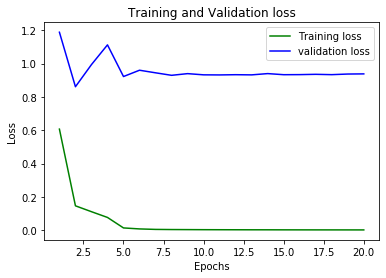

In [57]:
plot_loss(training_loss_ht, validation_loss_ht, 20)

The model might just be underfit as we can see the training loss does not converge much after 5 epochs and the validation also does not learn much with little oscillating noise. The optimal number of epochs is chosen as the loss remains almost constant after that and the model is trained again as below.

In [65]:
#choosing optimal epoch as there is no or very less learning
w_count_ht, training_loss_ht, validation_loss_ht = SGD(train_bow_count_vector, train_data_sent_lbl, dev_bow_count_vector, 
                                                    dev_data_sent_lbl, 0.03, 0.00001, 10, 0.0001, False)

#### Evaluation

#### Compute accuracy, precision, recall and F1-scores:

In [66]:
preds_te_count = predict_class(test_bow_count_vector, w_count_ht)

print('Accuracy:', accuracy_score(test_data_sent_lbl,preds_te_count))
print('Precision:', precision_score(test_data_sent_lbl,preds_te_count))
print('Recall:', recall_score(test_data_sent_lbl,preds_te_count))
print('F1-Score:', f1_score(test_data_sent_lbl,preds_te_count))

Accuracy: 0.8125
Precision: 0.7990430622009569
Recall: 0.835
F1-Score: 0.8166259168704156


#### Finally, print the top-10 words for the negative and positive class respectively.

In [67]:
top_neg = w_count_ht.flatten().argsort()[:10]
for i in top_neg:
    print(id2word_bow[i])

bad
boring
unfortunately
worst
supposed
script
nothing
3
filmmakers
looks


In [68]:
top_pos = w_count_ht.flatten().argsort()[::-1][:10]
for i in top_pos:
    print(id2word_bow[i])

great
seen
fun
black
perfectly
quite
works
pulp
see
jackie


#### If we were to apply the classifier we've learned into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain?

The features might just be sufficinet but not good enough to generalize on other domains. The negative features like bad, worst, nothing, looks, boring and 3 (assuming to be rating) might be important for both laptop and restaurant reviews. In case of positive features great, perfect, works, quite, fun might be important.

### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

The hypertune method is executed for a combination of smaller learning rates (lr) and higher regularisation strength along with the default values selected. Smaller learning rates are chosen so that the learning process will be slow which indeed require more epochs to converge so higher values for epochs are given. The regularisation strength (alpha) will help in penalizing the weights for overfitting especially when there are more number of features and also it helps in achieving better generalization rather than having any affect on the performance.

## Train and Evaluate Logistic Regression with TF.IDF vectors

#### Follow the same steps as above (i.e. evaluating count n-gram representations).


### Now repeat the training and evaluation process for BOW-tfidf, BOCN-count, BOCN-tfidf, BOW+BOCN including hyperparameter tuning for each model...

## BOW-tfidf

In [69]:
# BOW-tfidf

w_tfidf, training_loss, validation_loss = SGD(train_bow_tfidf_vector, train_data_sent_lbl, dev_bow_tfidf_vector, 
                                                    dev_data_sent_lbl, 0.1, 0.00001, 5, 0.0001, False)

In [70]:
preds_te_count = predict_class(dev_bow_tfidf_vector, w_tfidf)

print('Accuracy:', accuracy_score(dev_data_sent_lbl,preds_te_count))
print('Precision:', precision_score(dev_data_sent_lbl,preds_te_count))
print('Recall:', recall_score(dev_data_sent_lbl,preds_te_count))
print('F1-Score:', f1_score(dev_data_sent_lbl,preds_te_count))

Accuracy: 0.775
Precision: 0.7570093457943925
Recall: 0.81
F1-Score: 0.782608695652174


In [48]:
#hypertune(train_bow_tfidf_vector, train_data_sent_lbl, dev_bow_tfidf_vector, dev_data_sent_lbl, 100, True)

Evaluation Metrics: [{'Ac': 0.855, 'Pr': 0.8380952380952381, 'Re': 0.88, 'F1': 0.8585365853658538}
 {'Ac': 0.855, 'Pr': 0.8380952380952381, 'Re': 0.88, 'F1': 0.8585365853658538}
 {'Ac': 0.855, 'Pr': 0.8514851485148515, 'Re': 0.86, 'F1': 0.8557213930348259}
 {'Ac': 0.84, 'Pr': 0.84, 'Re': 0.84, 'F1': 0.8399999999999999}
 {'Ac': 0.84, 'Pr': 0.84, 'Re': 0.84, 'F1': 0.8399999999999999}]

Parameters: [{'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.03, 'alpha': 0.001, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.03, 'alpha': 0.001, 'epochs': 30, 'epochs_threshold_dev': 30}
 {'lr': 0.03, 'alpha': 0.001, 'epochs': 30, 'epochs_threshold_dev': 30}]


Below is the table with top 5 best performed combinations of hypertuned parameters

|  | lr  | alpha  | accuracy  | f1-score  | epoch  |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  | 0.01  | 0.01  | 0.855  | 0.8585  |  50 |
| 2  | 0.01  | 0.01  | 0.855  | 0.8585  | 50  |
| 3  | 0.03  | 0.001  | 0.855  | 0.8557  | 50  |
| 4  | 0.03  | 0.001  | 0.84  | 0.8399  | 30  |
| 5  | 0.03  | 0.001  | 0.84  | 0.8399  | 30  |

Accuracy of the validation is improved with hypertuning. The best performance for validation is achieved with lower learning rate, alpha and higher epoch than the default ones and the model is trained again with the tuned parameters. 

In [74]:
w_tfidf_ht, training_loss_ht, validation_loss_ht = SGD(train_bow_tfidf_vector, train_data_sent_lbl, dev_bow_tfidf_vector, 
                                                    dev_data_sent_lbl, 0.01, 0.01, 50, 0.0001, False)

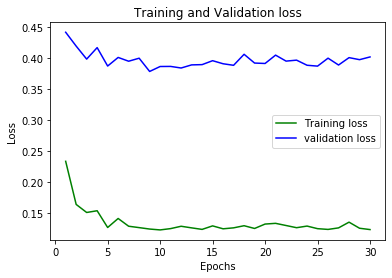

In [76]:
plot_loss(training_loss_ht, validation_loss_ht, 50)

The model might be underfitting as we can see the validation loss follows a similar trend as of training and drop in loss towards the end indicate further learning can be achieved.

In [77]:
w_tfidf_ht, training_loss_ht, validation_loss_ht = SGD(train_bow_tfidf_vector, train_data_sent_lbl, dev_bow_tfidf_vector, 
                                                    dev_data_sent_lbl, 0.01, 0.01, 30, 0.0001, False)

In [78]:
preds_te_count = predict_class(test_bow_tfidf_vector, w_tfidf_ht)

print('Accuracy:', accuracy_score(test_data_sent_lbl,preds_te_count))
print('Precision:', precision_score(test_data_sent_lbl,preds_te_count))
print('Recall:', recall_score(test_data_sent_lbl,preds_te_count))
print('F1-Score:', f1_score(test_data_sent_lbl,preds_te_count))

Accuracy: 0.8175
Precision: 0.7953488372093023
Recall: 0.855
F1-Score: 0.8240963855421686


In [79]:
top_neg = w_tfidf_ht.flatten().argsort()[:10]
for i in top_neg:
    print(id2word_bow[i])

bad
worst
boring
unfortunately
supposed
awful
guess
waste
nothing
minute


In [80]:
top_pos = w_tfidf_ht.flatten().argsort()[::-1][:10]
for i in top_pos:
    print(id2word_bow[i])

great
fun
hilarious
simple
perfectly
overall
8
seen
memorable
works


#### If we were to apply the classifier we've learned into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain?

The features especially negative, seems to be good to generalize on other domains. The negative features like bad, worst, waste, awful, boring and nothing might be important for both laptop and restaurant reviews. In case of positive features great, perfect, 8, fun and simple might be important.

#### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

The hypertune method is executed for a combination of smaller learning rates (lr) and higher regularisation strength and epochs along with the default values selected. Smaller learning rates are chosen so that the learning process will be slow which indeed require more epochs to converge so higher values for epochs are given. The best performance is achieved at values of 0.01 for learning rate and 50 epochs which shows increase in epoch with smaller value of lr. A higher regularisation strength (alpha) is obtained from the tuning putting restriction on picking up any patterns or unwanted noise.

## BOCN-count

In [82]:
# BOCN-count

vocab_bocn_sent, df_bocn_sent, ngram_count_bocn_sent = get_vocab(train_data_sent_txt, ngram_range=(2,4), min_df=5, keep_topN=2000, 
                                   stop_words=stop_words, char_ngrams=True)

#extract ngram
train_ngram_bocn = [extract_ngrams(train_data_sent_txt[x],ngram_range=(2,4),stop_words=stop_words, 
                              vocab=vocab_bocn_sent, char_ngrams=True) for x in range(0, len(train_data_sent_txt))]

dev_ngram_bocn = [extract_ngrams(dev_data_sent_txt[x],ngram_range=(2,4),stop_words=stop_words, 
                              vocab=vocab_bocn_sent, char_ngrams=True) for x in range(0, len(dev_data_sent_txt))]

test_ngram_bocn = [extract_ngrams(test_data_sent_txt[x],ngram_range=(2,4),stop_words=stop_words, 
                              vocab=vocab_bocn_sent, char_ngrams=True) for x in range(0, len(test_data_sent_txt))]

In [83]:
id2word_bocn = {i:list(vocab_bocn_sent)[i] for i in range(0,len(vocab_bocn_sent))}
word2id_bocn = {list(vocab_bocn_sent)[i]:i for i in range(0,len(vocab_bocn_sent))}

In [84]:
#build ngram vector
train_bocn_count_vector = vectorise(train_ngram_bocn, vocab_bocn_sent)
dev_bocn_count_vector = vectorise(dev_ngram_bocn, vocab_bocn_sent)
test_bocn_count_vector = vectorise(test_ngram_bocn, vocab_bocn_sent)

In [69]:
w_count, training_loss, validation_loss = SGD(train_bocn_count_vector, train_data_sent_lbl, dev_bocn_count_vector, 
                                                    dev_data_sent_lbl, 0.003, 0.00001, 10, 0.0001, True)

train_epoch: 1, loss: 4.0492
dev_epoch: 1, loss: 5.0442
train_epoch: 2, loss: 4.7675
dev_epoch: 2, loss: 5.2102
train_epoch: 3, loss: 5.8148
dev_epoch: 3, loss: 5.7565
train_epoch: 4, loss: 5.5545
dev_epoch: 4, loss: 5.6820
train_epoch: 5, loss: 6.4243
dev_epoch: 5, loss: 6.2562
train_epoch: 6, loss: 2.5263
dev_epoch: 6, loss: 5.5614
train_epoch: 7, loss: 1.6846
dev_epoch: 7, loss: 4.2378
train_epoch: 8, loss: 2.1336
dev_epoch: 8, loss: 3.3920
train_epoch: 9, loss: 1.4515
dev_epoch: 9, loss: 4.3388
train_epoch: 10, loss: 1.3511
dev_epoch: 10, loss: 4.0969


To avoid the runtime error for exp overflow, the learning rate is reduced and epochs are increased here.

In [71]:
preds_te_count = predict_class(dev_bocn_count_vector, w_count)

print('Accuracy:', accuracy_score(dev_data_sent_lbl,preds_te_count))
print('Precision:', precision_score(dev_data_sent_lbl,preds_te_count))
print('Recall:', recall_score(dev_data_sent_lbl,preds_te_count))
print('F1-Score:', f1_score(dev_data_sent_lbl,preds_te_count))

Accuracy: 0.775
Precision: 0.7272727272727273
Recall: 0.88
F1-Score: 0.7963800904977375


Also the choice of parameter values for hypertuning are changed to handle the exp overflow error while calculating the weights.

In [76]:
#lr=[0.001,0.002,0.003,0.0001,0.0005] 
#alpha=[0.00001,0.00001,0.0001,0.001,0.01]
#epochs=[20,50,100,150,200]

#hypertune(train_bocn_count_vector, train_data_sent_lbl, dev_bocn_count_vector, dev_data_sent_lbl, 15, True)

C:\Users\varma\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Evaluation Metrics: [{'Ac': 0.79, 'Pr': 0.7843137254901961, 'Re': 0.8, 'F1': 0.792079207920792}
 {'Ac': 0.78, 'Pr': 0.7641509433962265, 'Re': 0.81, 'F1': 0.7864077669902914}
 {'Ac': 0.78, 'Pr': 0.75, 'Re': 0.84, 'F1': 0.7924528301886793}
 {'Ac': 0.775, 'Pr': 0.7722772277227723, 'Re': 0.78, 'F1': 0.7761194029850748}
 {'Ac': 0.765, 'Pr': 0.7431192660550459, 'Re': 0.81, 'F1': 0.7751196172248804}]

Parameters: [{'lr': 0.003, 'alpha': 1e-05, 'epochs': 20, 'epochs_threshold_dev': 20}
 {'lr': 0.0001, 'alpha': 0.01, 'epochs': 100, 'epochs_threshold_dev': 100}
 {'lr': 0.002, 'alpha': 1e-05, 'epochs': 150, 'epochs_threshold_dev': 97}
 {'lr': 0.002, 'alpha': 1e-05, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.0005, 'alpha': 0.001, 'epochs': 100, 'epochs_threshold_dev': 49}]


Below is the table with top 5 best performed combinations of hypertuned parameters

|  | lr  | alpha  | accuracy  | f1-score  | epoch  |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  | 0.003  | 0.00001  | 0.79  | 0.792  |  20 |
| 2  | 0.0001  | 0.01  | 0.78  | 0.786  | 100  |
| 3  | 0.002  | 0.00001  | 0.78  | 0.792  | 150(97)  |
| 4  | 0.002  | 0.0001  | 0.775  | 0.776  | 50  |
| 5  | 0.0005  | 0.001  | 0.765  | 0.775  | 100(49)  |

Accuracy of the validation is marginally improved with hypertuning.

In [77]:
w_count_ht, training_loss_ht, validation_loss_ht = SGD(train_bocn_count_vector, train_data_sent_lbl, dev_bocn_count_vector, 
                                                    dev_data_sent_lbl, 0.003, 0.00001, 20, 0.0001, False)

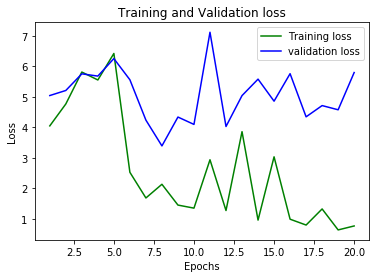

In [78]:
plot_loss(training_loss_ht, validation_loss_ht, 20)

The model might be slightly overfitting as the validation loss follows a incraseing trend with the decrease in training loss after certain epochs. An optimal epoch is selected and the model is build again as below. 

In [107]:
w_count_ht, training_loss_ht, validation_loss_ht = SGD(train_bocn_count_vector, train_data_sent_lbl, dev_bocn_count_vector, 
                                                    dev_data_sent_lbl, 0.003, 0.00001, 7, 0.0001, False)

In [108]:
preds_te_count = predict_class(test_bocn_count_vector, w_count_ht)

print('Accuracy:', accuracy_score(test_data_sent_lbl,preds_te_count))
print('Precision:', precision_score(test_data_sent_lbl,preds_te_count))
print('Recall:', recall_score(test_data_sent_lbl,preds_te_count))
print('F1-Score:', f1_score(test_data_sent_lbl,preds_te_count))

Accuracy: 0.7775
Precision: 0.7466666666666667
Recall: 0.84
F1-Score: 0.7905882352941176


In [99]:
top_neg = w_count_ht.flatten().argsort()[:10]
for i in top_neg:
    print(id2word_bocn[i])

bad
ba
ad
up
un
po
ors
act
tal
ch


In [100]:
top_pos = w_count_ht.flatten().argsort()[::-1][:10]
for i in top_pos:
    print(id2word_bocn[i])

lso
also
erf
rf
fu
ood
als
gr
ind
ck


#### If we were to apply the classifier we've learned into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain?

The features seems not good to generalize on other domains. The negative features like bad, ba, ad, ors might be important and the positive features ood, gr, erf, might be important.

#### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

The hypertune method is executed for a combination of very small learning rates (lr) and higher regularisation strength and epochs are selected. Smaller learning rates are chosen inorder to avoid the runtime error and to slow down the learning process. The best performance is achieved at values of 0.0031 for learning rate and 50 epochs which shows increase in epoch with smaller value of lr. The regularisation strength (alpha) remains same and in this configuration the increase in alpha is actually reducing the model performance on the test data.

## BOCN-tfidf

In [110]:
# BOCN-tfidf
idf_array = compute_idf(train_data_sent_txt, vocab_bocn_sent, df_bocn_sent)

train_bocn_tfidf_vector = np.multiply(train_bocn_count_vector, idf_array)
dev_bocn_tfidf_vector = np.multiply(dev_bocn_count_vector, idf_array)
test_bocn_tfidf_vector = np.multiply(test_bocn_count_vector, idf_array)

w_tfidf, training_loss, validation_loss = SGD(train_bocn_tfidf_vector, train_data_sent_lbl, dev_bocn_tfidf_vector, 
                                                    dev_data_sent_lbl, 0.1, 0.00001, 5, 0.0001, False)

In [111]:
preds_te_count = predict_class(dev_bocn_tfidf_vector, w_tfidf)

print('Accuracy:', accuracy_score(dev_data_sent_lbl,preds_te_count))
print('Precision:', precision_score(dev_data_sent_lbl,preds_te_count))
print('Recall:', recall_score(dev_data_sent_lbl,preds_te_count))
print('F1-Score:', f1_score(dev_data_sent_lbl,preds_te_count))

Accuracy: 0.8
Precision: 0.8125
Recall: 0.78
F1-Score: 0.7959183673469388


In [145]:
#parameters are updated
#lr=[0.03,0.05,0.07,0.1,0.2]
#alpha=[0.00001,0.00001,0.0001,0.001,0.01]
#epochs=[10,20,30,50,100]

#hypertune(train_bocn_tfidf_vector, train_data_sent_lbl, dev_bocn_tfidf_vector, dev_data_sent_lbl, 50, True)

Evaluation Metrics: [{'Ac': 0.815, 'Pr': 0.8, 'Re': 0.84, 'F1': 0.8195121951219512}
 {'Ac': 0.815, 'Pr': 0.8058252427184466, 'Re': 0.83, 'F1': 0.8177339901477833}
 {'Ac': 0.815, 'Pr': 0.8, 'Re': 0.84, 'F1': 0.8195121951219512}
 {'Ac': 0.81, 'Pr': 0.8163265306122449, 'Re': 0.8, 'F1': 0.8080808080808082}
 {'Ac': 0.81, 'Pr': 0.8163265306122449, 'Re': 0.8, 'F1': 0.8080808080808082}]

Parameters: [{'lr': 0.1, 'alpha': 1e-05, 'epochs': 20, 'epochs_threshold_dev': 20}
 {'lr': 0.1, 'alpha': 1e-05, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.1, 'alpha': 1e-05, 'epochs': 20, 'epochs_threshold_dev': 20}
 {'lr': 0.07, 'alpha': 1e-05, 'epochs': 10, 'epochs_threshold_dev': 10}
 {'lr': 0.07, 'alpha': 1e-05, 'epochs': 10, 'epochs_threshold_dev': 10}]


Below is the table with top 5 best performed combinations of hypertuned parameters

|  | lr  | alpha  | accuracy  | f1-score  | epoch  |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  | 0.1  | 0.00001  | 0.815  | 0.8195  |  20 |
| 2  | 0.1  | 0.00001  | 0.815  | 0.8177  | 50  |
| 3  | 0.1  | 0.00001  | 0.815  | 0.8195  | 20  |
| 4  | 0.07  | 0.00001  | 0.81  | 0.808  | 10  |
| 5  | 0.07  | 0.00001  | 0.81  | 0.808  | 10  |

Accuracy of the validation is very marginally improved with hypertuning.

In [129]:
w_tfidf_ht, training_loss_ht, validation_loss_ht = SGD(train_bocn_tfidf_vector, train_data_sent_lbl, dev_bocn_tfidf_vector, 
                                                    dev_data_sent_lbl, 0.1, 0.00001, 20, 0.0001, False)

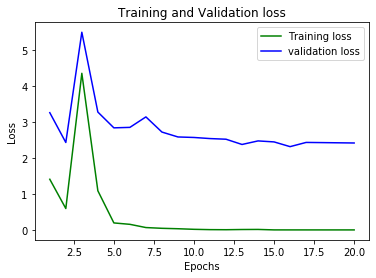

In [126]:
plot_loss(training_loss_ht, validation_loss_ht, 20)

The model might just about right as the validation loss follows similar trend with the training loss and after certain epochs there is not much improvement in the loss.  

In [130]:
preds_te_count = predict_class(test_bocn_tfidf_vector, w_tfidf_ht)

print('Accuracy:', accuracy_score(test_data_sent_lbl,preds_te_count))
print('Precision:', precision_score(test_data_sent_lbl,preds_te_count))
print('Recall:', recall_score(test_data_sent_lbl,preds_te_count))
print('F1-Score:', f1_score(test_data_sent_lbl,preds_te_count))

Accuracy: 0.7475
Precision: 0.7438423645320197
Recall: 0.755
F1-Score: 0.7493796526054591


In [131]:
top_neg = w_tfidf_ht.flatten().argsort()[:10]
for i in top_neg:
    print(id2word_bocn[i])

bad
why
was
then
entl
erl
othi
kl
east
oa


In [132]:
top_pos = w_tfidf_ht.flatten().argsort()[::-1][:10]
for i in top_pos:
    print(id2word_bocn[i])

det
grea
lso
lp
ref
iver
ltho
erf
fec
bit


#### If we were to apply the classifier we've learned into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain?

The features might not be good to generalize on other domains. The negative features bad, oa might be important and positive features grea, erf, fec might be important.

#### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

The hypertune method is executed for a combination of small learning rates (lr) and higher regularisation strength and epochs are selected. The best performance is achieved at values of 0.1 for learning rate and 20 epochs which indicates the convergence was not happening with default learning rate and the regularisation strength (alpha) remains same.

## BOW-BOCN

In [85]:
#selecting tfidf for BOW and raw frequency weighting for BOCN
#BOW(tfidf)-BOCN(count)
#merging feature vector representation of BOW and BOCN

train_bow_bocn_vector = np.hstack((train_bow_tfidf_vector, train_bocn_count_vector))
dev_bow_bocn_vector = np.hstack((dev_bow_tfidf_vector, dev_bocn_count_vector))
test_bow_bocn_vector = np.hstack((test_bow_tfidf_vector, test_bocn_count_vector))

In this feature representation there might be duplicate entries of the ngrams/features that are present in BOW and BOCN, they would get the same weights after the training.

In [86]:
w_bow_bocn, training_loss, validation_loss = SGD(train_bow_bocn_vector, train_data_sent_lbl, dev_bow_bocn_vector, 
                                                    dev_data_sent_lbl, 0.003, 0.00001, 10, 0.0001, False, 4000)

In [87]:
preds_te_count = predict_class(dev_bow_bocn_vector, w_bow_bocn)

print('Accuracy:', accuracy_score(dev_data_sent_lbl,preds_te_count))
print('Precision:', precision_score(dev_data_sent_lbl,preds_te_count))
print('Recall:', recall_score(dev_data_sent_lbl,preds_te_count))
print('F1-Score:', f1_score(dev_data_sent_lbl,preds_te_count))

Accuracy: 0.785
Precision: 0.7663551401869159
Recall: 0.82
F1-Score: 0.7922705314009661


In [89]:
#lr=[0.001,0.002,0.003,0.0001,0.0005] 
#alpha=[0.00001,0.00001,0.0001,0.001,0.01]
#epochs=[10,20,30,50,100]

#hypertune(train_bow_bocn_vector, train_data_sent_lbl, dev_bow_bocn_vector, dev_data_sent_lbl, 20, True, 4000)

C:\Users\varma\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Evaluation Metrics: [{'Ac': 0.81, 'Pr': 0.81, 'Re': 0.81, 'F1': 0.81}
 {'Ac': 0.8, 'Pr': 0.7884615384615384, 'Re': 0.82, 'F1': 0.803921568627451}
 {'Ac': 0.79, 'Pr': 0.7543859649122807, 'Re': 0.86, 'F1': 0.8037383177570094}
 {'Ac': 0.79, 'Pr': 0.7636363636363637, 'Re': 0.84, 'F1': 0.8000000000000002}
 {'Ac': 0.79, 'Pr': 0.7788461538461539, 'Re': 0.81, 'F1': 0.7941176470588236}]

Parameters: [{'lr': 0.0005, 'alpha': 0.01, 'epochs': 10, 'epochs_threshold_dev': 10}
 {'lr': 0.002, 'alpha': 0.0001, 'epochs': 30, 'epochs_threshold_dev': 30}
 {'lr': 0.0005, 'alpha': 0.001, 'epochs': 30, 'epochs_threshold_dev': 30}
 {'lr': 0.002, 'alpha': 0.0001, 'epochs': 20, 'epochs_threshold_dev': 20}
 {'lr': 0.0005, 'alpha': 1e-05, 'epochs': 50, 'epochs_threshold_dev': 50}]


Below is the table with top 5 best performed combinations of hypertuned parameters

|  | lr  | alpha  | accuracy  | f1-score  | epoch  |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  | 0.0005  | 0.01  | 0.81  | 0.81  |  10 |
| 2  | 0.002  | 0.0001  | 0.8  | 0.803  | 30  |
| 3  | 0.0005  | 0.001  | 0.79  | 0.803  | 30  |
| 4  | 0.002  | 0.0001  | 0.79  | 0.800  | 20  |
| 5  | 0.0005  | 0.00001  | 0.79  | 0.794  | 50  |

Accuracy of the validation is improved with hypertuning.

In [90]:
w_bow_bocn_ht, training_loss_ht, validation_loss_ht = SGD(train_bow_bocn_vector, train_data_sent_lbl, dev_bow_bocn_vector, 
                                                    dev_data_sent_lbl, 0.0005, 0.01, 10, 0.0001, False, 4000)

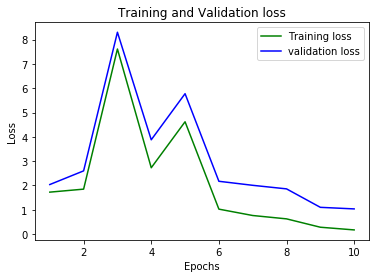

In [92]:
plot_loss(training_loss_ht, validation_loss_ht, 10)

The model looks a good fit as the validation loss and training loss are close and follow a similar pattern.  

In [93]:
preds_te_count = predict_class(test_bow_bocn_vector, w_bow_bocn_ht)

print('Accuracy:', accuracy_score(test_data_sent_lbl,preds_te_count))
print('Precision:', precision_score(test_data_sent_lbl,preds_te_count))
print('Recall:', recall_score(test_data_sent_lbl,preds_te_count))
print('F1-Score:', f1_score(test_data_sent_lbl,preds_te_count))

Accuracy: 0.8025
Precision: 0.8201058201058201
Recall: 0.775
F1-Score: 0.7969151670951157


In [94]:
#combined vocab of BOW-BOCN
vocab_bow_bocn = list(vocab_bow_sent)
vocab_bow_bocn.extend(list(vocab_bocn_sent))
id2word_bow_bocn = {i:list(vocab_bow_bocn)[i] for i in range(0,len(vocab_bow_bocn))}

In [95]:
top_neg = w_bow_bocn_ht.flatten().argsort()[:10]
for i in top_neg:
    print(id2word_bow_bocn[i])

bad
ad
ba
up
un
tal
sa
gi
ors
po


In [96]:
top_pos = w_bow_bocn_ht.flatten().argsort()[::-1][:10]
for i in top_pos:
    print(id2word_bow_bocn[i])

lso
gr
also
erf
ood
rf
tru
gre
als
grea


#### If we were to apply the classifier we've learned into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain?

The features are not good to generalize on other domains. The negative features bad, ors, ad might be important and positive features gre, erf, ood might be important.

#### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

The hypertune method is executed for a combination of small learning rates (lr) and higher regularisation strength and epochs. The best performance is achieved at values of 0.003 for learning rate and 20 epochs.



## Full Results

Add here your results:

| LR | Precision  | Recall  | F1-Score  | Accuracy  |
|:-:|:-:|:-:|:-:|:-:|
| BOW-count  | 0.7990  | 0.835  | 0.8166  | 0.8125  |
| BOW-tfidf  | 0.7953  | 0.855  | 0.8240  | 0.8175  |
| BOCN-count  | 0.7466  | 0.84  | 0.7905  | 0.7775  |
| BOCN-tfidf  | 0.7438  | 0.755  | 0.7493  | 0.7475  |
| BOW+BOCN  | 0.8201  | 0.775  | 0.7969  | 0.8025  |


Overall BOW-tfidf model has the best evaluation results on the test data, the F1-score is the best when compared to other models which indicates a good balance between precision and recall. As the Bag-of-words TFIDF holds the information about the important n-grams (gives priority to the imporatnat less frequent n-grams) when compared to just the raw frequencies. Also Bag-of-words with higher level n-grams is most useful when there is a need to understand the combination of n-grams. 

# Task 2: Multi-class Logistic Regression 

Now you need to train a Multiclass Logistic Regression (MLR) Classifier by extending the Binary model you developed above. You will use the MLR model to perform topic classification on the AG news dataset consisting of three classes:

- Class 1: World
- Class 2: Sports
- Class 3: Business

You need to follow the same process as in Task 1 for data processing and feature extraction by reusing the functions you wrote.

In [188]:
#import AG news data 
train_data_mc = pd.read_csv('./data_topic/train.csv', header=None)
dev_data_mc = pd.read_csv('./data_topic/dev.csv', header=None)
test_data_mc = pd.read_csv('./data_topic/test.csv', header=None)

In [189]:
#sample of the data
train_data_mc.head(5)
#dev_data_mc.head(5)
#test_data_mc.head(5)

,0,1
0,1,Reuters - Venezuelans turned out early\and in ...
1,1,Reuters - South Korean police used water canno...
2,1,Reuters - Thousands of Palestinian\prisoners i...
3,1,AFP - Sporadic gunfire and shelling took place...
4,1,AP - Dozens of Rwandan soldiers flew into Suda...


In [190]:
#info about the each dataset
train_data_mc.info()
dev_data_mc.info()
test_data_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2400 non-null   int64 
 1   1       2400 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       150 non-null    int64 
 1   1       150 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       900 non-null    int64 
 1   1       900 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.2+ KB


In [191]:
#distribution of the class and check for missing entries
print(train_data_mc[0].value_counts('1'))
print(dev_data_mc[0].value_counts('1'))
print(test_data_mc[0].value_counts('1'))

3    0.333333
1    0.333333
2    0.333333
Name: 0, dtype: float64
3    0.333333
2    0.333333
1    0.333333
Name: 0, dtype: float64
3    0.333333
2    0.333333
1    0.333333
Name: 0, dtype: float64


In [192]:
#check for any Null values
print("Train_data:", sum(np.isnan(train_data_mc[0])))
print("Validation_data:", sum(np.isnan(dev_data_mc[0])))
print("Test_data:", sum(np.isnan(test_data_mc[0])))

Train_data: 0
Validation_data: 0
Test_data: 0


No missing values found in the datasets and all the three classes are equally distributed.

In [193]:
#create document and label variables
train_data_mc_txt = list(train_data_mc[1])
train_data_mc_lbl = np.array(train_data_mc[0])

dev_data_mc_txt = list(dev_data_mc[1])
dev_data_mc_lbl = np.array(dev_data_mc[0])

test_data_mc_txt = list(test_data_mc[1])
test_data_mc_lbl = np.array(test_data_mc[0])

In [194]:
vocab_bow_mc, df_bow_mc, ngram_count_bow_mc = get_vocab(train_data_mc_txt, ngram_range=(1,3), min_df=5, keep_topN=2000, stop_words=stop_words, char_ngrams=False)

#extract ngram
train_ngram_bow = [extract_ngrams(train_data_mc_txt[x],ngram_range=(1,3),stop_words=stop_words, 
                              vocab=vocab_bow_mc, char_ngrams=False) for x in range(0, len(train_data_mc_txt))]

dev_ngram_bow = [extract_ngrams(dev_data_mc_txt[x],ngram_range=(1,3),stop_words=stop_words, 
                              vocab=vocab_bow_mc, char_ngrams=False) for x in range(0, len(dev_data_mc_txt))]

test_ngram_bow = [extract_ngrams(test_data_mc_txt[x],ngram_range=(1,3),stop_words=stop_words, 
                              vocab=vocab_bow_mc, char_ngrams=False) for x in range(0, len(test_data_mc_txt))]
#build ngram vector
train_bow_count_vector = vectorise(train_ngram_bow, vocab_bow_mc)
dev_bow_count_vector = vectorise(dev_ngram_bow, vocab_bow_mc)
test_bow_count_vector = vectorise(test_ngram_bow, vocab_bow_mc)

#### Now you need to change `SGD` to support multiclass datasets. First you need to develop a `softmax` function. It takes as input:

- `z`: array of real numbers 

#### and returns:

- `smax`: the softmax of `z`

In [195]:
def softmax(z):
    num = np.exp(z)
    sum_num = np.sum(num)
    smax = num/sum_num
    return smax

#### Then modify `predict_proba` and `predict_class` functions for the multiclass case:

In [196]:
def predict_proba(X, weights, num_classes=3):
    z = np.dot(X, weights.T)
    preds_proba = np.array([np.empty([num_classes]) for i in range(z.shape[0])])
    for i in range(z.shape[0]):
        preds_proba[i] = softmax(z[i])
    return preds_proba

In [197]:
def predict_class(X, weights, num_classes=3):
    
    y_prob = predict_proba(X, weights, num_classes)
    preds_class = np.array([np.argmax(i)+1 for i in y_prob])
    
    return preds_class

#### Now you need to compute the categorical cross entropy loss (extending the binary loss to support multiple classes).

In [198]:
def categorical_loss(X, Y, weights, num_classes=3, alpha=0.00001):
    '''
    X:(len(X),len(vocab))
    Y: array len(Y)
    weights: array len(X)
    '''
    ts = X.shape[0]
    prd_prob = predict_proba(X, weights, num_classes)
    
    prd_prob_up = np.where(prd_prob==0.0, 1e-5, prd_prob)
    
    l=0
    #as Y is integer and we need to calculate loss for the true class, instead of creating a prob dist or 
    #applying one-hot encoding for Y we can calculate sum of log(p(yc)) for true class corresponding to label
    for sample, i in zip(prd_prob_up, Y):
        l += -np.log(sample[i-1])         
    
    loss_l2 = (l + (alpha * np.sum(weights**2))) / ts
    
    return loss_l2

#### Finally you need to modify SGD to support the categorical cross entropy loss:

In [203]:
def SGD_MC(X_tr, Y_tr, X_dev=[], Y_dev=[], num_classes=3, lr=0.01, alpha=0.00001, 
        epochs=5, tolerance=0.001, print_progress=True, feature_size=2000):
    
    ts = X_tr.shape[0]
    training_loss_history = []
    validation_loss_history = []
    #weights = np.zeros((num_classes,feature_size))
    stop_train = False
    for epoch in range(epochs):  # loop over the dataset multiple times
        #randomise train set
        index = list(range(len(X_tr)))
        random.Random(epoch).shuffle(index)
        x_tr  = X_tr[index,]
        y_tr = Y_tr.reshape(-1,1)[index,]
        
        #running_loss = 0.0
        for i in range(len(X_tr)):
            prd_prob = predict_proba(x_tr[i].reshape(1,-1), weights, num_classes)
            
            prd_prob[np.arange(1),(y_tr[i]-1)] -= 1
                
            weights = weights - (lr * (np.dot((prd_prob).T, (x_tr[i]).reshape(1,-1)) + 2*alpha*weights))
            
        #training
        loss_l2 = categorical_loss(X_tr, Y_tr, weights, num_classes, alpha)
        training_loss_history.append(loss_l2)
        
        # print progress
        if(print_progress):
            print('train_epoch: %d, loss: %.4f' % (epoch + 1, loss_l2))
            
        #validation
        if len(X_dev) !=0 and len(Y_dev) !=0: 
            loss_l2_dev = categorical_loss(X_dev, Y_dev, weights, num_classes, alpha)
            validation_loss_history.append(loss_l2_dev)    
            # print progress
            if(print_progress):
                print('dev_epoch: %d, loss: %.4f' % (epoch + 1, loss_l2_dev))
        
            if (epoch > 3 and abs(validation_loss_history[epoch-1] - validation_loss_history[epoch]) < tolerance):
                break
    
    training_loss_history = np.array(training_loss_history)
    validation_loss_history = np.array(validation_loss_history)
    
    return weights, training_loss_history, validation_loss_history

In [201]:
# Implementation of hyperparameter tuning

lr=[0.01,0.03,0.05,0.07,0.1] 
alpha=[0.00001,0.0001,0.001,0.01,0.1]
epochs=[10,20,30,50,100] 
tolerance=[0.0001]

def hypertune_mc(X_tr, Y_tr, X_dev, Y_dev, iterate=10, print_metrics=True, feature_size=2000):
    eval_ht = [] 
    param_ht = []
    for i in range(iterate):
        a,b,c = random.Random(i).choices(range(5), k=3)
        w, tl, vl = SGD_MC(X_tr, Y_tr, X_dev, Y_dev, 3,
        lr[a], alpha[b], epochs[c], 0.0001, False, feature_size)
        #training_loss_ht.append(tl)
        #validation_loss_ht.append(vl)
        preds_te_count = predict_class(X_dev, w, 3)
        eval_dict = {'Ac':accuracy_score(Y_dev,preds_te_count), 'Pr':precision_score(Y_dev,preds_te_count,average='macro'),
                  'Re':recall_score(Y_dev,preds_te_count,average='macro'), 'F1':f1_score(Y_dev,preds_te_count,average='macro')}
        eval_ht.append(eval_dict)
        param_ht.append({'lr':lr[a], 'alpha':alpha[b], 'epochs':epochs[c], 'epochs_threshold_dev':len(vl)})

    indx = sorted(range(len(eval_ht)), key=lambda k: eval_ht[k]['Ac'], reverse=True)

    eval_ht_sorted = [eval_ht[i] for i in indx]
    param_ht_sorted = [param_ht[i] for i in indx]

    if print_metrics:
        print("Evaluation Metrics:", np.array(eval_ht_sorted[:5]))
        print("\nParameters:", np.array(param_ht_sorted[:5]))

#### Now you are ready to train and evaluate you MLR following the same steps as in Task 1 for the different vector representations

In [204]:
w_count, training_loss_count, validation_loss_count = SGD_MC(train_bow_count_vector, train_data_mc_lbl, dev_bow_count_vector, 
                                                          dev_data_mc_lbl, 3, 0.1, 0.00001, 5, 0.0001, True)

train_epoch: 1, loss: 0.2127
dev_epoch: 1, loss: 0.3696
train_epoch: 2, loss: 0.1477
dev_epoch: 2, loss: 0.3399
train_epoch: 3, loss: 0.1151
dev_epoch: 3, loss: 0.3441
train_epoch: 4, loss: 0.0956
dev_epoch: 4, loss: 0.3396
train_epoch: 5, loss: 0.0728
dev_epoch: 5, loss: 0.3197


In [205]:
preds_te_count = predict_class(dev_bow_count_vector, w_count)

print('Accuracy:', accuracy_score(dev_data_mc_lbl,preds_te_count))
print('Precision:', precision_score(dev_data_mc_lbl,preds_te_count,average='macro'))
print('Recall:', recall_score(dev_data_mc_lbl,preds_te_count,average='macro'))
print('F1-Score:', f1_score(dev_data_mc_lbl,preds_te_count,average='macro'))

Accuracy: 0.8933333333333333
Precision: 0.893895356617155
Recall: 0.8933333333333332
F1-Score: 0.8930730991225436


In [206]:
#hypertune_mc(train_bow_count_vector, train_data_mc_lbl, dev_bow_count_vector, dev_data_mc_lbl, 50, True)

Evaluation Metrics: [{'Ac': 0.9133333333333333, 'Pr': 0.9157801418439716, 'Re': 0.9133333333333332, 'F1': 0.9129870971925046}
 {'Ac': 0.9133333333333333, 'Pr': 0.9157801418439716, 'Re': 0.9133333333333332, 'F1': 0.9129870971925046}
 {'Ac': 0.9066666666666666, 'Pr': 0.9066358024691358, 'Re': 0.9066666666666666, 'F1': 0.9059392987964417}
 {'Ac': 0.9066666666666666, 'Pr': 0.9066358024691358, 'Re': 0.9066666666666666, 'F1': 0.9059392987964417}
 {'Ac': 0.9066666666666666, 'Pr': 0.907890499194847, 'Re': 0.9066666666666666, 'F1': 0.9063034188034188}]

Parameters: [{'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 24}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 24}
 {'lr': 0.05, 'alpha': 0.001, 'epochs': 30, 'epochs_threshold_dev': 30}
 {'lr': 0.03, 'alpha': 0.001, 'epochs': 30, 'epochs_threshold_dev': 30}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 20, 'epochs_threshold_dev': 20}]


Below is the table with top 5 best performed combinations of hypertuned parameters

|  | lr  | alpha  | accuracy  | f1-score  | epoch  |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  | 0.01  | 0.01  | 0.9133  | 0.9129  |  50(24) |
| 2  | 0.01  | 0.01  | 0.9133  | 0.9129  | 50(24)  |
| 3  | 0.05  | 0.001  | 0.9066  | 0.9059  | 30  |
| 4  | 0.03  | 0.001  | 0.9066  | 0.9059  | 30  |
| 5  | 0.01  | 0.01  | 0.9066  | 0.9063  | 20  |

Accuracy of the validation is slightly improved with hypertuning.

In [207]:
#model training with the tuned hyperparameter values
w_count_ht, training_loss_ht, validation_loss_ht = SGD_MC(train_bow_count_vector, train_data_mc_lbl, dev_bow_count_vector, 
                                                    dev_data_mc_lbl, 3, 0.01, 0.01, 24, 0.0001, False)

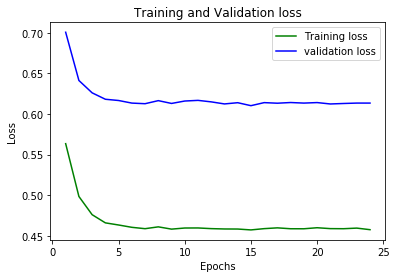

In [208]:
plot_loss(training_loss_ht, validation_loss_ht, 24)

The model might just about right as we can see the validation converge after certain epochs and the loss is almost constant with epochs and does not learn much. The optimal number of epochs is chosen as the loss remains almost constant after that and the model is trained again as below.

In [210]:
#model training with the tuned hyperparameter values
w_count_ht, training_loss_ht, validation_loss_ht = SGD_MC(train_bow_count_vector, train_data_mc_lbl, dev_bow_count_vector, 
                                                    dev_data_mc_lbl, 3, 0.01, 0.01, 8, 0.0001, False)

#### Compute accuracy, precision, recall and F1-scores:

In [211]:
preds_te = predict_class(test_bow_count_vector, w_count_ht, 3)

print('Accuracy:', accuracy_score(test_data_mc_lbl,preds_te))
print('Precision:', precision_score(test_data_mc_lbl,preds_te,average='macro'))
print('Recall:', recall_score(test_data_mc_lbl,preds_te,average='macro'))
print('F1-Score:', f1_score(test_data_mc_lbl,preds_te,average='macro'))

Accuracy: 0.8511111111111112
Precision: 0.8545154705181487
Recall: 0.8511111111111113
F1-Score: 0.8507015484703112


#### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

The hypertune method is executed for a combination of smaller learning rates and higher regularisation strength along with the default values selected. Smaller learning rates are chosen so that the learning process will be slow which indeed require more epochs to converge so higher values for epochs are given. The regularisation strength (alpha) will help in penalizing the weights for overfitting especially when there are more number of features and also it helps in achieving better generalization.

### Now repeat the training and evaluation process for BOW-tfidf, BOCN-count, BOCN-tfidf, BOW+BOCN including hyperparameter tuning...

## BOW-tfidf

In [212]:
#BOW-tfidf
idf_array = compute_idf(train_data_mc_txt, vocab_bow_mc, df_bow_mc)
train_bow_tfidf_vector = np.multiply(train_bow_count_vector, idf_array)
dev_bow_tfidf_vector = np.multiply(dev_bow_count_vector, idf_array)
test_bow_tfidf_vector = np.multiply(test_bow_count_vector, idf_array)

In [213]:
w_count_tfidf, training_loss_count, validation_loss_count = SGD_MC(train_bow_tfidf_vector, train_data_mc_lbl, dev_bow_tfidf_vector, 
                                                          dev_data_mc_lbl, 3, 0.1, 0.00001, 5, 0.0001, True)

train_epoch: 1, loss: 0.2612
dev_epoch: 1, loss: 0.3861
train_epoch: 2, loss: 0.1296
dev_epoch: 2, loss: 0.4654
train_epoch: 3, loss: 0.1072
dev_epoch: 3, loss: 0.5822
train_epoch: 4, loss: 0.1046
dev_epoch: 4, loss: 0.4725
train_epoch: 5, loss: 0.0435
dev_epoch: 5, loss: 0.4890


In [214]:
preds_te_count = predict_class(dev_bow_tfidf_vector, w_count_tfidf,3)

print('Accuracy:', accuracy_score(dev_data_mc_lbl,preds_te_count))
print('Precision:', precision_score(dev_data_mc_lbl,preds_te_count,average='macro'))
print('Recall:', recall_score(dev_data_mc_lbl,preds_te_count,average='macro'))
print('F1-Score:', f1_score(dev_data_mc_lbl,preds_te_count,average='macro'))

Accuracy: 0.84
Precision: 0.8391947974158217
Recall: 0.8400000000000002
F1-Score: 0.8392037407293996


In [215]:
#hypertune_mc(train_bow_tfidf_vector, train_data_mc_lbl, dev_bow_tfidf_vector, dev_data_mc_lbl, 50, True,2000)

Evaluation Metrics: [{'Ac': 0.92, 'Pr': 0.9222600151171579, 'Re': 0.9199999999999999, 'F1': 0.9192500978002468}
 {'Ac': 0.9133333333333333, 'Pr': 0.9147688060731539, 'Re': 0.9133333333333332, 'F1': 0.912396247807299}
 {'Ac': 0.9133333333333333, 'Pr': 0.9147688060731539, 'Re': 0.9133333333333332, 'F1': 0.912396247807299}
 {'Ac': 0.9, 'Pr': 0.9018881626724764, 'Re': 0.9, 'F1': 0.899649256423618}
 {'Ac': 0.9, 'Pr': 0.9018222867279472, 'Re': 0.8999999999999999, 'F1': 0.8997244682236717}]

Parameters: [{'lr': 0.01, 'alpha': 0.01, 'epochs': 20, 'epochs_threshold_dev': 20}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.01, 'alpha': 0.1, 'epochs': 50, 'epochs_threshold_dev': 27}
 {'lr': 0.03, 'alpha': 0.001, 'epochs': 20, 'epochs_threshold_dev': 20}]


Below is the table with top 5 best performed combinations of hypertuned parameters

|  | lr  | alpha  | accuracy  | f1-score  | epoch  |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  | 0.01  | 0.01  | 0.92  | 0.9192  |  20 |
| 2  | 0.01  | 0.01  | 0.9133  | 0.9123  | 50  |
| 3  | 0.01  | 0.01  | 0.9133  | 0.9123  | 50  |
| 4  | 0.01  | 0.1  | 0.9  | 0.8996  | 50(27)  |
| 5  | 0.03  | 0.001  | 0.9  | 0.8997  | 20  |

Accuracy of the validation is significantly improved with hypertuning.

In [216]:
w_count_tfidf_ht, training_loss_ht, validation_loss_ht = SGD_MC(train_bow_tfidf_vector, train_data_mc_lbl, 
                                                                dev_bow_tfidf_vector, dev_data_mc_lbl, 3, 0.01, 0.01, 
                                                                20, 0.0001, False)

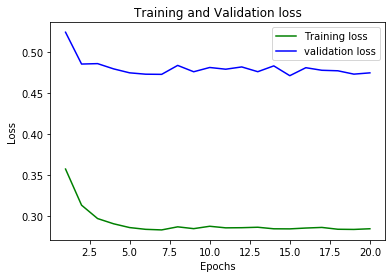

In [217]:
plot_loss(training_loss_ht, validation_loss_ht, 20)

The model might just be underfit as well. The loss is almost constant with epochs and does not learn much.

In [223]:
w_count_tfidf_ht, training_loss_ht, validation_loss_ht = SGD_MC(train_bow_tfidf_vector, train_data_mc_lbl, 
                                                                dev_bow_tfidf_vector, dev_data_mc_lbl, 3, 0.01, 0.01, 
                                                                20, 0.0001, False)

In [224]:
preds_te = predict_class(test_bow_tfidf_vector, w_count_tfidf_ht, 3)

print('Accuracy:', accuracy_score(test_data_mc_lbl,preds_te))
print('Precision:', precision_score(test_data_mc_lbl,preds_te,average='macro'))
print('Recall:', recall_score(test_data_mc_lbl,preds_te,average='macro'))
print('F1-Score:', f1_score(test_data_mc_lbl,preds_te,average='macro'))

Accuracy: 0.8711111111111111
Precision: 0.8722275796642686
Recall: 0.8711111111111111
F1-Score: 0.8706958687869514


#### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

The hypertune method is executed for a combination of smaller learning rates and higher regularisation strength along with the default values selected. Smaller learning rates are chosen so that the learning process will be slow which indeed require more epochs to converge so higher values for epochs are given. The regularisation strength (alpha) here is high so as to normalize the weights. 

## BOCN-count

In [225]:
# BOCN-count

vocab_bocn_mc, df_bocn_mc, ngram_count_bocn_mc = get_vocab(train_data_mc_txt, ngram_range=(2,4), min_df=5, keep_topN=2000, 
                                   stop_words=stop_words, char_ngrams=True)

#extract ngram
train_ngram_bocn = [extract_ngrams(train_data_mc_txt[x],ngram_range=(2,4),stop_words=stop_words, 
                              vocab=vocab_bocn_mc, char_ngrams=True) for x in range(0, len(train_data_mc_txt))]

dev_ngram_bocn = [extract_ngrams(dev_data_mc_txt[x],ngram_range=(2,4),stop_words=stop_words, 
                              vocab=vocab_bocn_mc, char_ngrams=True) for x in range(0, len(dev_data_mc_txt))]

test_ngram_bocn = [extract_ngrams(test_data_mc_txt[x],ngram_range=(2,4),stop_words=stop_words, 
                              vocab=vocab_bocn_mc, char_ngrams=True) for x in range(0, len(test_data_mc_txt))]
#build ngram vector
train_bocn_count_vector = vectorise(train_ngram_bocn, vocab_bocn_mc)
dev_bocn_count_vector = vectorise(dev_ngram_bocn, vocab_bocn_mc)
test_bocn_count_vector = vectorise(test_ngram_bocn, vocab_bocn_mc)

In [226]:
w_count, training_loss, validation_loss = SGD_MC(train_bocn_count_vector, train_data_mc_lbl, dev_bocn_count_vector, 
                                                    dev_data_mc_lbl, 3, 0.1, 0.00001, 5, 0.0001, False)

In [227]:
preds_te_count = predict_class(dev_bocn_count_vector, w_count,3)

print('Accuracy:', accuracy_score(dev_data_mc_lbl,preds_te_count))
print('Precision:', precision_score(dev_data_mc_lbl,preds_te_count,average='macro'))
print('Recall:', recall_score(dev_data_mc_lbl,preds_te_count,average='macro'))
print('F1-Score:', f1_score(dev_data_mc_lbl,preds_te_count,average='macro'))

Accuracy: 0.7933333333333333
Precision: 0.801644424451442
Recall: 0.7933333333333333
F1-Score: 0.7920049165717548


In [228]:
#hypertune_mc(train_bocn_count_vector, train_data_mc_lbl, dev_bocn_count_vector, dev_data_mc_lbl, 50, True,2000)

Evaluation Metrics: [{'Ac': 0.8533333333333334, 'Pr': 0.8578132803509, 'Re': 0.8533333333333332, 'F1': 0.8529628982374803}
 {'Ac': 0.8533333333333334, 'Pr': 0.8539827278429102, 'Re': 0.8533333333333334, 'F1': 0.8529379173709071}
 {'Ac': 0.8533333333333334, 'Pr': 0.8578132803509, 'Re': 0.8533333333333332, 'F1': 0.8529628982374803}
 {'Ac': 0.84, 'Pr': 0.8533967391304348, 'Re': 0.84, 'F1': 0.838401559454191}
 {'Ac': 0.8333333333333334, 'Pr': 0.8375084175084174, 'Re': 0.8333333333333334, 'F1': 0.8340350877192982}]

Parameters: [{'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 20, 'epochs_threshold_dev': 20}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.03, 'alpha': 0.001, 'epochs': 10, 'epochs_threshold_dev': 10}
 {'lr': 0.01, 'alpha': 0.001, 'epochs': 10, 'epochs_threshold_dev': 10}]


Below is the table with top 5 best performed combinations of hypertuned parameters

|  | lr  | alpha  | accuracy  | f1-score  | epoch  |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  | 0.01  | 0.01  | 0.8533  | 0.8529  |  50 |
| 2  | 0.01  | 0.01  | 0.8533  | 0.8529  | 20  |
| 3  | 0.01  | 0.01  | 0.8533  | 0.8529  | 50  |
| 4  | 0.03  | 0.001  | 0.84  | 0.8384  | 10  |
| 5  | 0.01  | 0.001  | 0.833  | 0.833  | 10  |

Accuracy of the validation is improved with hypertuning.

In [252]:
w_count_ht, training_loss_ht, validation_loss_ht = SGD_MC(train_bocn_count_vector, train_data_mc_lbl, dev_bocn_count_vector, 
                                                          dev_data_mc_lbl, 3, 0.01, 0.01, 50, 0.0001, False)

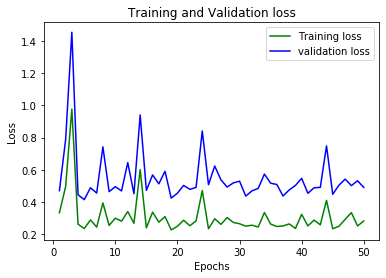

In [253]:
plot_loss(training_loss_ht, validation_loss_ht, 50)

The model looks a good fit as the validation loss follows the training loss and the values are close.  

In [254]:
preds_te = predict_class(test_bocn_count_vector, w_count_ht, 3)

print('Accuracy:', accuracy_score(test_data_mc_lbl,preds_te))
print('Precision:', precision_score(test_data_mc_lbl,preds_te,average='macro'))
print('Recall:', recall_score(test_data_mc_lbl,preds_te,average='macro'))
print('F1-Score:', f1_score(test_data_mc_lbl,preds_te,average='macro'))

Accuracy: 0.76
Precision: 0.7736582605155752
Recall: 0.7599999999999999
F1-Score: 0.7562898612250778


#### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

The hypertune method is executed for a combination of smaller learning rates and higher regularisation strength along with the default values selected. Smaller learning rates are chosen so that the learning process will be slow which indeed require more epochs to converge so higher values for epochs are given. The regularisation strength (alpha) here is proportional to the performance as we reduce it the performance of the model is hampered.

## BOCN-tfidf

In [243]:
#BOCN-tfidf

idf_array = compute_idf(train_data_mc_txt, vocab_bocn_mc, df_bocn_mc)
train_bocn_tfidf_vector = np.multiply(train_bocn_count_vector, idf_array)
dev_bocn_tfidf_vector = np.multiply(dev_bocn_count_vector, idf_array)
test_bocn_tfidf_vector = np.multiply(test_bocn_count_vector, idf_array)

w_tfidf, training_loss_tfidf, validation_loss_tfidf = SGD_MC(train_bocn_tfidf_vector, train_data_mc_lbl, dev_bocn_tfidf_vector, 
                                                    dev_data_mc_lbl, 3, 0.1, 0.00001, 5, 0.0001, False)

In [244]:
preds_te_count = predict_class(dev_bocn_tfidf_vector, w_tfidf,3)

print('Accuracy:', accuracy_score(dev_data_mc_lbl,preds_te_count))
print('Precision:', precision_score(dev_data_mc_lbl,preds_te_count,average='macro'))
print('Recall:', recall_score(dev_data_mc_lbl,preds_te_count,average='macro'))
print('F1-Score:', f1_score(dev_data_mc_lbl,preds_te_count,average='macro'))

Accuracy: 0.7866666666666666
Precision: 0.7955836919342382
Recall: 0.7866666666666666
F1-Score: 0.7865556328490726


In [247]:
#hypertune_mc(train_bocn_tfidf_vector, train_data_mc_lbl, dev_bocn_tfidf_vector, dev_data_mc_lbl, 50, True,2000)

Evaluation Metrics: [{'Ac': 0.8666666666666667, 'Pr': 0.8675348062140514, 'Re': 0.8666666666666666, 'F1': 0.8659546257610522}
 {'Ac': 0.8666666666666667, 'Pr': 0.8668308518375903, 'Re': 0.8666666666666667, 'F1': 0.8663459107287124}
 {'Ac': 0.84, 'Pr': 0.8566341066341066, 'Re': 0.84, 'F1': 0.8403690799179371}
 {'Ac': 0.8333333333333334, 'Pr': 0.8360665478312538, 'Re': 0.8333333333333334, 'F1': 0.8329484620194543}
 {'Ac': 0.8333333333333334, 'Pr': 0.8360665478312538, 'Re': 0.8333333333333334, 'F1': 0.8329484620194543}]

Parameters: [{'lr': 0.01, 'alpha': 0.1, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 20, 'epochs_threshold_dev': 20}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 10, 'epochs_threshold_dev': 10}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 50}]


Below is the table with top 5 best performed combinations of hypertuned parameters

|  | lr  | alpha  | accuracy  | f1-score  | epoch  |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  | 0.01  | 0.1  | 0.866  | 0.865  |  50 |
| 2  | 0.01  | 0.01  | 0.866  | 0.866  | 20  |
| 3  | 0.01  | 0.01  | 0.84  | 0.840  | 10  |
| 4  | 0.01  | 0.01  | 0.833  | 0.832  | 50  |
| 5  | 0.01  | 0.01  | 0.833  | 0.832  | 50  |

Accuracy of the validation is significantly improved with hypertuning.

In [248]:
w_tfidf_ht, training_loss_ht, validation_loss_ht = SGD_MC(train_bocn_tfidf_vector, train_data_mc_lbl, dev_bocn_tfidf_vector, 
                                                    dev_data_mc_lbl, 3, 0.01, 0.1, 50, 0.0001, False)

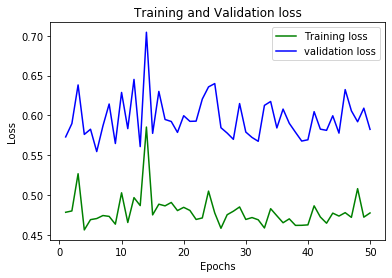

In [250]:
plot_loss(training_loss_ht, validation_loss_ht, 50)

The model is about right as the validation loss follows the training loss.

In [251]:
preds_te_count = predict_class(test_bocn_tfidf_vector, w_tfidf_ht,3)

print('Accuracy:', accuracy_score(test_data_mc_lbl,preds_te_count))
print('Precision:', precision_score(test_data_mc_lbl,preds_te_count,average='macro'))
print('Recall:', recall_score(test_data_mc_lbl,preds_te_count,average='macro'))
print('F1-Score:', f1_score(test_data_mc_lbl,preds_te_count,average='macro'))

Accuracy: 0.8055555555555556
Precision: 0.8062600956257673
Recall: 0.8055555555555557
F1-Score: 0.8029299270696458


### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

The hypertune method is executed for a combination of smaller learning rates and higher regularisation strength along with the default values selected. Smaller learning rates are chosen so that the learning process will be slow which indeed require more epochs to converge so higher values for epochs are given.

## BOW-BOCN

In [255]:
#selecting tfidf weighting for both BOW and BOCN
#BOW(tfidf)-BOCN(tfidf)
train_bow_bocn_vector = np.hstack((train_bow_tfidf_vector, train_bocn_tfidf_vector))
dev_bow_bocn_vector = np.hstack((dev_bow_tfidf_vector, dev_bocn_tfidf_vector))
test_bow_bocn_vector = np.hstack((test_bow_tfidf_vector, test_bocn_tfidf_vector))

In [256]:
w_bow_bocn, training_loss, validation_loss = SGD_MC(train_bow_bocn_vector, train_data_mc_lbl, dev_bow_bocn_vector, 
                                                    dev_data_mc_lbl, 3, 0.1, 0.00001, 5, 0.0001, False, 4000)

In [257]:
preds_te_count = predict_class(dev_bow_bocn_vector, w_bow_bocn)

print('Accuracy:', accuracy_score(dev_data_mc_lbl,preds_te_count))
print('Precision:', precision_score(dev_data_mc_lbl,preds_te_count, average='macro'))
print('Recall:', recall_score(dev_data_mc_lbl,preds_te_count,average='macro'))
print('F1-Score:', f1_score(dev_data_mc_lbl,preds_te_count,average='macro'))

Accuracy: 0.8733333333333333
Precision: 0.8741830065359477
Recall: 0.8733333333333334
F1-Score: 0.8735771536337307


In [258]:
#hypertune_mc(train_bow_bocn_vector, train_data_mc_lbl, dev_bow_bocn_vector, dev_data_mc_lbl, 50, True,4000)

Evaluation Metrics: [{'Ac': 0.8866666666666667, 'Pr': 0.8873042550353475, 'Re': 0.8866666666666667, 'F1': 0.886926025935927}
 {'Ac': 0.8866666666666667, 'Pr': 0.8873042550353475, 'Re': 0.8866666666666667, 'F1': 0.886926025935927}
 {'Ac': 0.8866666666666667, 'Pr': 0.8896604938271605, 'Re': 0.8866666666666667, 'F1': 0.8874934589220304}
 {'Ac': 0.8866666666666667, 'Pr': 0.8896604938271605, 'Re': 0.8866666666666667, 'F1': 0.8874934589220304}
 {'Ac': 0.88, 'Pr': 0.8807181637370317, 'Re': 0.8799999999999999, 'F1': 0.8792168885949883}]

Parameters: [{'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.01, 'alpha': 0.01, 'epochs': 50, 'epochs_threshold_dev': 50}
 {'lr': 0.03, 'alpha': 0.0001, 'epochs': 10, 'epochs_threshold_dev': 7}
 {'lr': 0.03, 'alpha': 0.0001, 'epochs': 10, 'epochs_threshold_dev': 7}
 {'lr': 0.01, 'alpha': 0.1, 'epochs': 50, 'epochs_threshold_dev': 50}]


Below is the table with top 5 best performed combinations of hypertuned parameters

|  | lr  | alpha  | accuracy  | f1-score  | epoch  |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 1  | 0.01  | 0.01  | 0.8866  | 0.8869  |  50 |
| 2  | 0.01  | 0.01  | 0.8866  | 0.8869  | 50  |
| 3  | 0.03  | 0.0001  | 0.8866  | 0.8874  | 10(7)  |
| 4  | 0.03  | 0.0001  | 0.8866  | 0.8874  | 10(7)  |
| 5  | 0.01  | 0.1  | 0.88  | 0.8792  | 50  |

Accuracy of the validation is improved with hypertuning.

In [259]:
w_bow_bocn_ht, training_loss_ht, validation_loss_ht = SGD_MC(train_bow_bocn_vector, train_data_mc_lbl, dev_bow_bocn_vector, 
                                                    dev_data_mc_lbl, 3, 0.01, 0.01, 50, 0.0001, False, 4000)

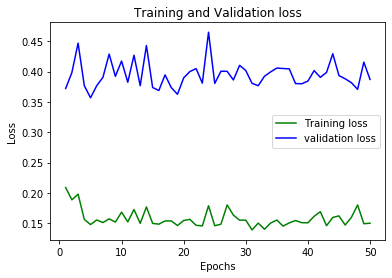

In [260]:
plot_loss(training_loss_ht, validation_loss_ht, 50)

The model might be overfit as the validation loss increases while the training loss decreases with the epochs.

In [261]:
preds_te_count = predict_class(test_bow_bocn_vector, w_bow_bocn_ht)

print('Accuracy:', accuracy_score(test_data_mc_lbl,preds_te_count))
print('Precision:', precision_score(test_data_mc_lbl,preds_te_count,average='macro'))
print('Recall:', recall_score(test_data_mc_lbl,preds_te_count,average='macro'))
print('F1-Score:', f1_score(test_data_mc_lbl,preds_te_count,average='macro'))

Accuracy: 0.84
Precision: 0.840782591980105
Recall: 0.84
F1-Score: 0.8389055329408417


#### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

The hypertune method is executed for a combination of smaller learning rates and higher regularisation strength along with the default values selected. Smaller learning rates are chosen so that the learning process will be slow which indeed require more epochs to converge so higher values for epochs are given.

## Full Results

Add here your results:

| LR | Precision  | Recall  | F1-Score  | Accuracy  |
|:-:|:-:|:-:|:-:|:-:|
| BOW-count  | 0.8545  | 0.8511  | 0.8507  | 0.8511  |
| BOW-tfidf  | 0.8722  | 0.8711  | 0.8706  | 0.8711  |
| BOCN-count  | 0.7736  | 0.7599  | 0.7562  | 0.76  |
| BOCN-tfidf  | 0.8062  | 0.8055  | 0.8029  | 0.8055  |
| BOW+BOCN  | 0.8407  | 0.84  | 0.8389  | 0.84  |


Again BOW-TFIDF has given the best performance results for the multi-class classification when compared to other models. All the metrics of  F1-score is quite high and balanced with values of precision and recall also being high. Bag-of-words with TFIDF had an edge over other models in terms of n-gram representation of combained words along with the normalized frequencies for the most and least important n-grams of the features. 

The combination of BOW and BOCN also performed better in case of binary and multinomial classification when compared to BOCN alone. 

## References


1. COM6513 Natural Language Processing: Lecture - 1 & 2.

2. Lab - Python Introduction for NLP

3. Speech and Language Processing. Daniel Jurafsky & James H. Martin. December 30, 2020.
   "https://web.stanford.edu/~jurafsky/slp3/5.pdf" 

4. Aman Sharma, Jun 2020
   "ML from Scratch-Multinomial Logistic Regression" from https://towardsdatascience.com/ml-from-scratch-multinomial-logistic-regression-6dda9cbacf9d

5. Rashida Nasrin, Sep 2020 
   "Multiclass Classification Using Logistic Regression from Scratch in Python" from https://towardsdatascience.com/multiclass-classification-algorithm-from-scratch-with-a-project-in-python-step-by-step-guide-485a83c79992

6. "Softmax regression" from "https://houxianxu.github.io/implementation/SoftmaxRegression.html"